# Analysis of sold new cars in Estonia 2021

Data is taken from official source - https://www.transpordiamet.ee/soidukitega-tehtud-toimingute-statistika

Only new cars where used in this analysis.


## Initial data

In [1]:
%reload_ext autoreload
%autoreload 0

import os

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mnt_sum import (
    get_summary,
    COLUMNS,
    PRIVATE_CUSTOMER,
    COLUMN_SHORT_NAME,
    COLUMN_CUSTOMER,
    COLUMN_CITY,
)

df_o = get_summary("data/2021")
df_o.describe()

,Esm reg aasta,Mootori võimsus,Mootori maht,CO2_NEDC_MAX,CO2_WLTP_MAX,Istekohti,Telgi kokku,Registrimass,Tühimass,Täismass,Arv,CO2_NEDC,CO2_WLTP
count,17964.0,17964.000000,17964.000000,14747.000000,16856.000000,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000,646.000000,904.000000
mean,2021.0,116.767953,1697.289356,124.819828,149.056300,5.151971,2.000111,2101.253062,1635.085894,2101.259185,1.259352,121.591331,141.870575
std,0.0,50.261654,628.923875,37.218637,42.740624,0.672137,0.010551,392.644848,344.361016,392.644127,1.980823,38.997637,41.669265
min,2021.0,25.300000,0.000000,0.000000,0.000000,2.000000,2.000000,1240.000000,957.000000,1240.000000,1.000000,0.000000,0.000000
25%,2021.0,88.000000,1368.000000,106.000000,129.000000,5.000000,2.000000,1840.000000,1419.000000,1840.000000,1.000000,106.000000,126.000000
50%,2021.0,110.000000,1580.000000,122.000000,144.000000,5.000000,2.000000,2015.000000,1554.000000,2015.000000,1.000000,120.000000,139.000000
75%,2021.0,131.000000,1987.000000,140.000000,166.000000,5.000000,2.000000,2225.000000,1736.000000,2225.000000,1.000000,133.000000,157.000000
max,2021.0,585.000000,7011.000000,452.000000,486.000000,9.000000,3.000000,5500.000000,4920.000000,5500.000000,170.000000,345.000000,373.000000


In [3]:
df_o.head()

,Kategooria,Mark,Mudel,Keretüüp,Esm reg aasta,Mootori tüüp,Mootori võimsus,Mootori maht,Heitmenorm,Hübriidi tüüp,...,Täismass,Värv,Maakond,Linn,Tüüp (isik),Arv,CO2_NEDC,CO2_WLTP,name,short name
93,M1,ADRIA,CORAL 670 DC,ELAMU,2021,DIISEL,118.0,2287,EURO 6 CI,<NA>,...,3500,HALL,HARJU MAAKOND,Määramata,FÜÜSILINE,1,<NA>,<NA>,ADRIA CORAL 670 DC,ADRIA CORAL 670 DC
94,M1,ALFA ROMEO,GIULIA,SEDAAN,2021,BENSIIN_KATALYSAATOR,148.0,1995,EURO 6 DG,<NA>,...,2060,HALL,HARJU MAAKOND,Määramata,JURIIDILINE,1,<NA>,<NA>,ALFA ROMEO GIULIA,ALFA ROMEO GIULIA
95,M1,ALFA ROMEO,STELVIO,UNIVERSAAL,2021,BENSIIN_KATALYSAATOR,206.0,1995,EURO 6 AP,<NA>,...,2350,PUNANE,HARJU MAAKOND,Tallinn,JURIIDILINE,1,<NA>,<NA>,ALFA ROMEO STELVIO,ALFA ROMEO STELVIO
96,M1,ALFA ROMEO,STELVIO,UNIVERSAAL,2021,DIISEL,154.0,2143,EURO 6 AP,<NA>,...,2410,SININE,HARJU MAAKOND,Tallinn,JURIIDILINE,1,<NA>,<NA>,ALFA ROMEO STELVIO,ALFA ROMEO STELVIO
97,M1,AUDI,A1 SPORTBACK,LUUKPÄRA,2021,BENSIIN_KATALYSAATOR,81.0,999,EURO 6 AP,<NA>,...,1680,HALL,HARJU MAAKOND,Tallinn,FÜÜSILINE,1,<NA>,<NA>,AUDI A1 SPORTBACK,AUDI A1


In [4]:
df = df_o[COLUMNS]

df.head()

,Mark,Mudel,short name,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp (isik),Arv,Värv
93,ADRIA,CORAL 670 DC,ADRIA CORAL 670 DC,DIISEL,2287,118.0,Määramata,FÜÜSILINE,1,HALL
94,ALFA ROMEO,GIULIA,ALFA ROMEO GIULIA,BENSIIN_KATALYSAATOR,1995,148.0,Määramata,JURIIDILINE,1,HALL
95,ALFA ROMEO,STELVIO,ALFA ROMEO STELVIO,BENSIIN_KATALYSAATOR,1995,206.0,Tallinn,JURIIDILINE,1,PUNANE
96,ALFA ROMEO,STELVIO,ALFA ROMEO STELVIO,DIISEL,2143,154.0,Tallinn,JURIIDILINE,1,SININE
97,AUDI,A1 SPORTBACK,AUDI A1,BENSIIN_KATALYSAATOR,999,81.0,Tallinn,FÜÜSILINE,1,HALL


## Add additional data

In [5]:
import yaml
from utils.file import read_file

SUVS = set(yaml.safe_load(read_file("data/suvs.yaml").lower()))

df["SUV"] = df[COLUMN_SHORT_NAME].str.lower().isin(SUVS)
df[df["SUV"]].head(5)

/tmp/ipykernel_582022/968145016.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SUV'] = df[COLUMN_SHORT_NAME].str.lower().isin(SUVS)


,Mark,Mudel,short name,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp (isik),Arv,Värv,SUV
101,AUDI,E-TRON SPORTBACK 55,AUDI E-TRON,ELEKTER,0,158.0,Tallinn,JURIIDILINE,1,VALGE,True
102,AUDI,Q3,AUDI Q3,BENSIIN_HYBRIID,1498,110.0,Tallinn,FÜÜSILINE,1,SININE,True
103,AUDI,Q3,AUDI Q3,DIISEL,1968,110.0,Tallinn,JURIIDILINE,3,HALL,True
104,AUDI,Q3,AUDI Q3,DIISEL,1968,110.0,Tallinn,JURIIDILINE,4,MUST,True
105,AUDI,Q3 SPORTBACK,AUDI Q3,BENSIIN_HYBRIID,1498,110.0,Tallinn,FÜÜSILINE,1,VALGE,True


# Total sold cars

In [6]:
df["Arv"].sum()

22623

# Popular fuels

                        Arv
Mootori tüüp               
BENSIIN_KATALYSAATOR  10773
BENSIIN_HYBRIID        5609
DIISEL                 4255
DIISEL_HYBRIID          988
ELEKTER                 487
CNG                     466
BENSIIN                  45


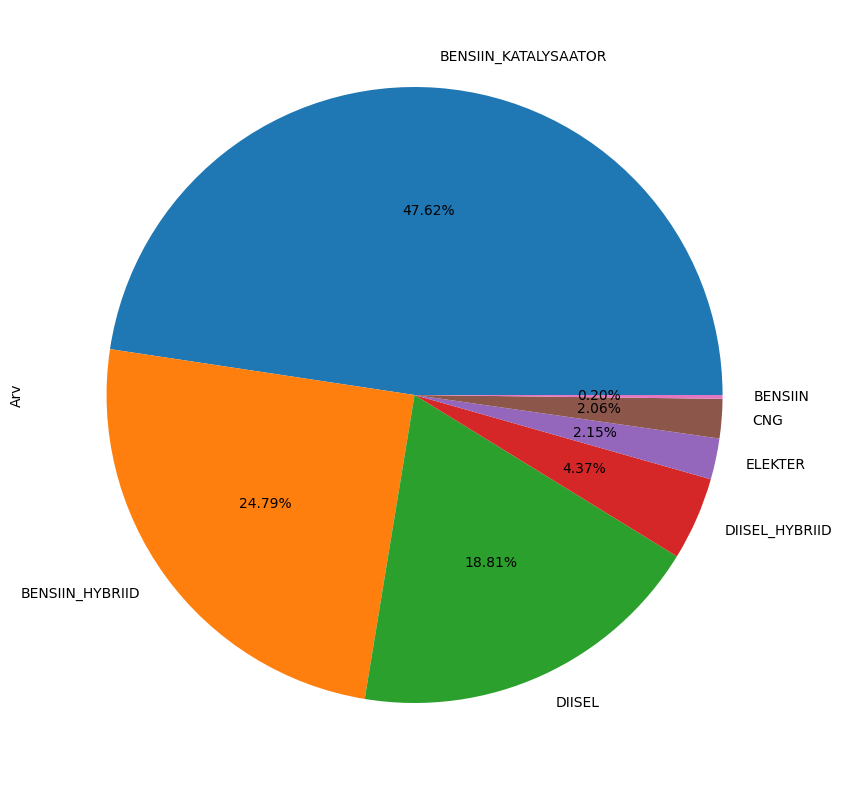

In [7]:
def show_pie(dataframe, groupby, index=None):
    plt.figure(figsize=(10, 10))
    dataframe = (
        dataframe.groupby([groupby], as_index=False)["Arv"]
        .sum()
        .sort_values("Arv", ascending=False)
        .reset_index(drop=True)
    )
    if index:
        dataframe.index = index
    else:
        dataframe = dataframe.set_index(groupby)
    dataframe["Arv"].plot.pie(autopct="%1.2f%%")
    print(dataframe)


show_pie(df, "Mootori tüüp")

# Popular colors

               Arv
Värv              
HALL          5607
MUST          3669
VALGE         3443
SININE        2723
PUNANE        1980
TUMEHALL      1420
HÕBEDANE       835
PRUUN          654
BEEŽ           440
ORANŽ          395
ROHELINE       387
TUMESININE     278
KOLLANE        178
TUMEPUNANE     147
HELEHALL       125
TUMEPRUUN       84
HELEROHELINE    55
HELEPRUUN       45
HELESININE      44
KULDNE          38
TUMEROHELINE    28
HELEBEEŽ        26
LILLA           20
ROOSA            1
MÄÄRAMATA        1


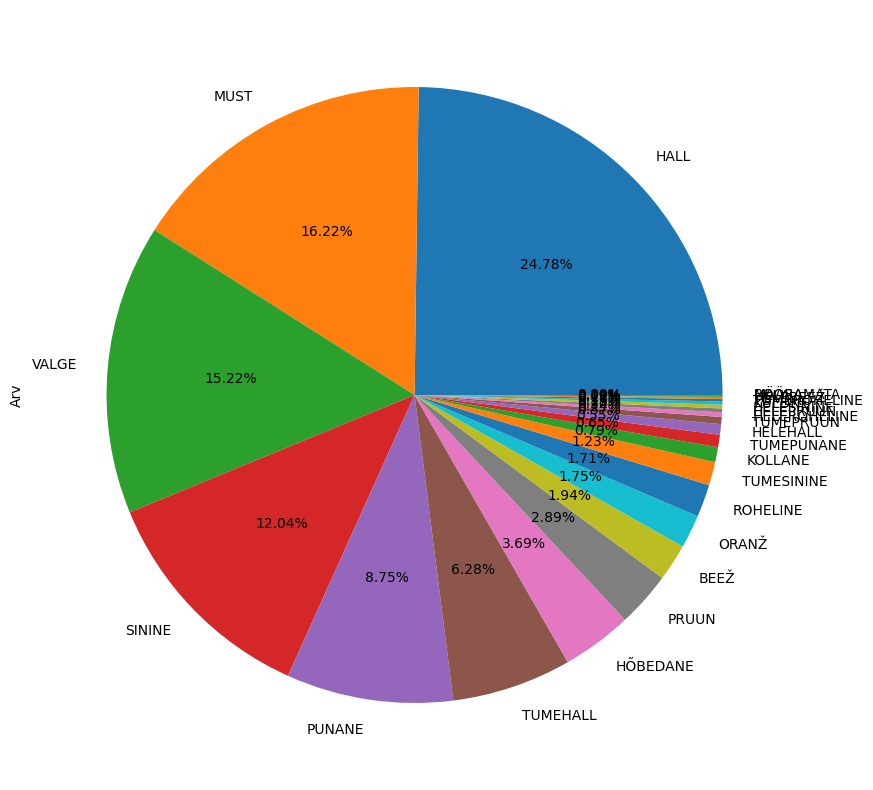

In [8]:
show_pie(df, "Värv")

# Engine capacities

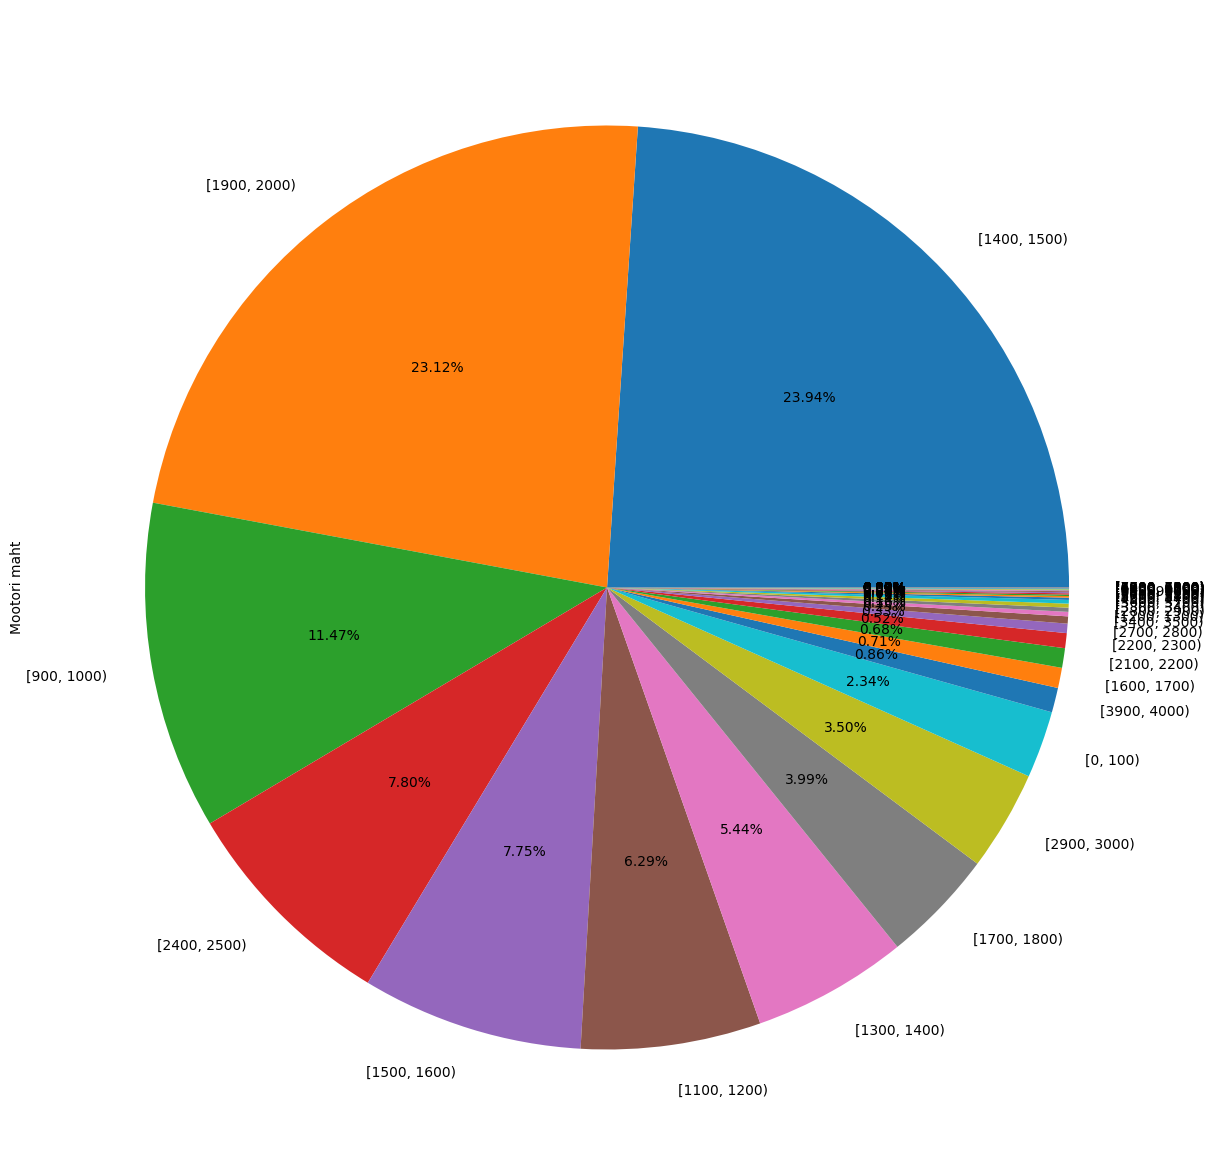

In [9]:
plt.figure(figsize=(15, 15))

bins = range(df["Mootori maht"].min(), df["Mootori maht"].max() + 100, 100)
capacities = pd.cut(df["Mootori maht"], bins, right=False).value_counts()
capacities.plot(kind="pie", autopct="%1.2f%%")
pass

# Top 10 popular manufacturers

          Mark   Arv
1       TOYOTA  3851
2        SKODA  3157
3   VOLKSWAGEN  1968
4          KIA  1867
5      PEUGEOT  1393
6      CITROEN  1318
7      RENAULT  1152
8      HYUNDAI   971
9        DACIA   742
10         BMW   704


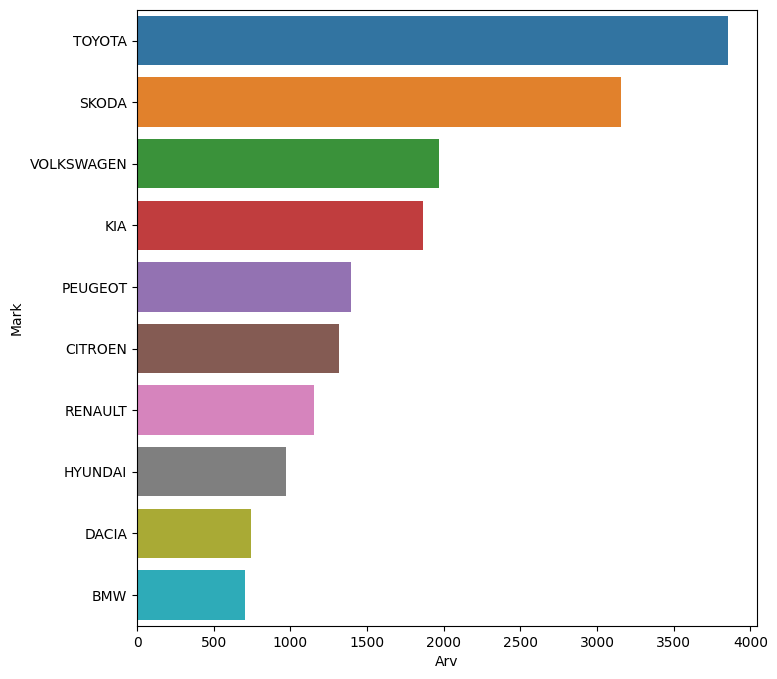

In [10]:
LIMIT = 10


def group_and_sort(data_frame, selection):
    return (
        data_frame.groupby(selection, as_index=False)["Arv"]
        .sum()
        .sort_values("Arv", ascending=False)
        .reset_index(drop=True)
    )


def group_sort_and_plot(data_frame, selection, x="Arv", y=None, limit=LIMIT, plot=True):
    data = group_and_sort(data_frame, selection)
    data.index += 1
    y = selection[0] if y is None else y
    if plot:
        plt.figure(figsize=(8, 8))
        sns.barplot(x=x, y=y, data=data[:limit], orient="h")
    print(data.head(limit))


group_sort_and_plot(df, ["Mark"])

## Top 10 popular car models

            short name   Arv
1          TOYOTA RAV4  1440
2        SKODA OCTAVIA  1110
3       TOYOTA COROLLA   922
4             KIA CEED   664
5         KIA SPORTAGE   633
6         SKODA KODIAQ   480
7   VOLKSWAGEN T-CROSS   447
8     CITROEN BERLINGO   428
9          SKODA KAMIQ   406
10        DACIA DUSTER   400


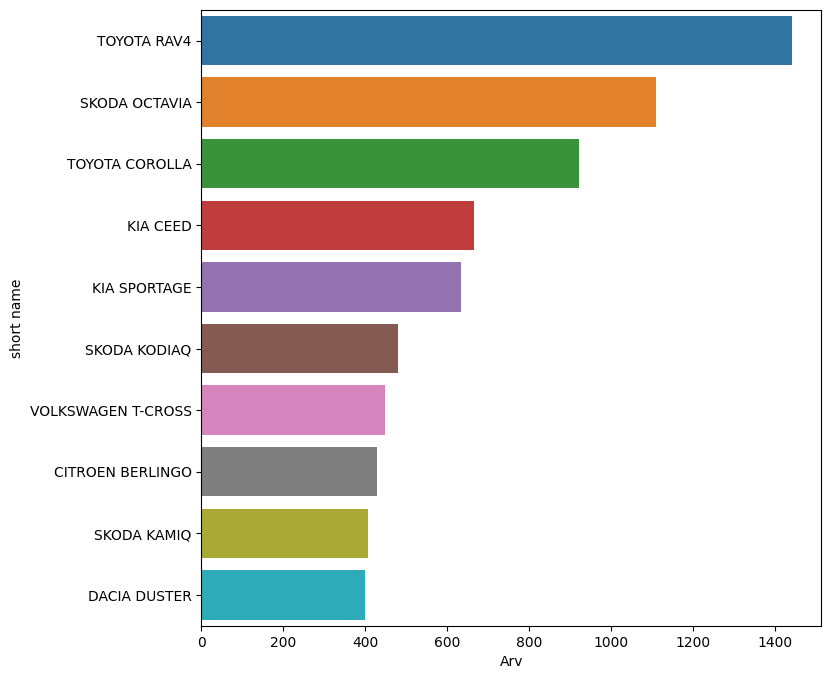

In [11]:
group_sort_and_plot(df, [COLUMN_SHORT_NAME])

### Top 10 popular diesel models

          short name  Arv
1   CITROEN BERLINGO  347
2      SKODA OCTAVIA  299
3       PEUGEOT 3008  285
4       DACIA DUSTER  236
5       SKODA KODIAQ  226
6       PEUGEOT 5008  207
7       PEUGEOT 2008  204
8       KIA SPORTAGE  204
9      TOYOTA PROACE  161
10           AUDI Q3  145


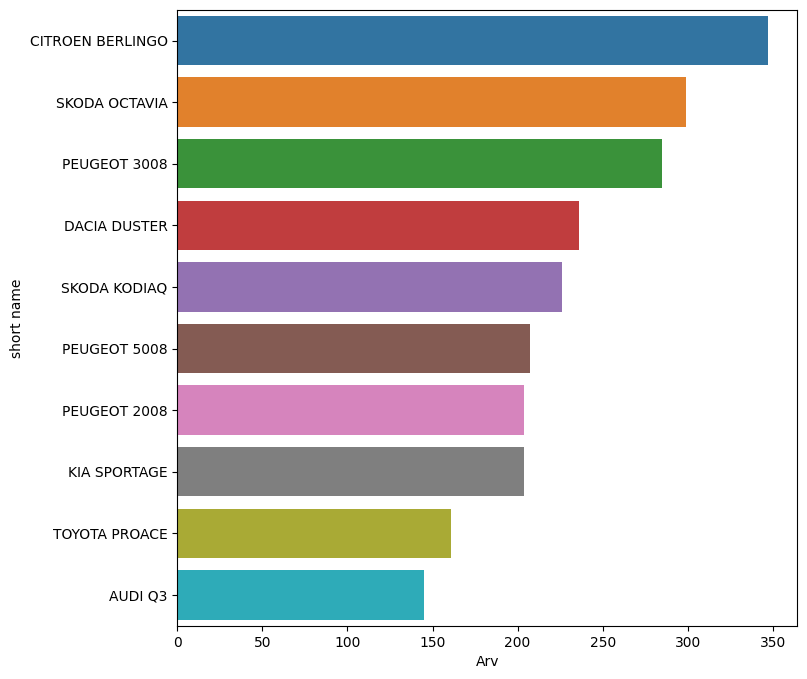

In [12]:
df_diesel = df[df["Mootori tüüp"].str.contains("DIISEL", case=False)]

group_sort_and_plot(df_diesel, [COLUMN_SHORT_NAME])

### Top 10 popular petrol models

            short name  Arv
1          TOYOTA RAV4  782
2             KIA CEED  545
3   VOLKSWAGEN T-CROSS  447
4         KIA SPORTAGE  422
5       SUBARU OUTBACK  348
6       TOYOTA COROLLA  337
7         RENAULT CLIO  334
8          SKODA KAMIQ  316
9    VOLKSWAGEN TIGUAN  277
10         SKODA KAROQ  268


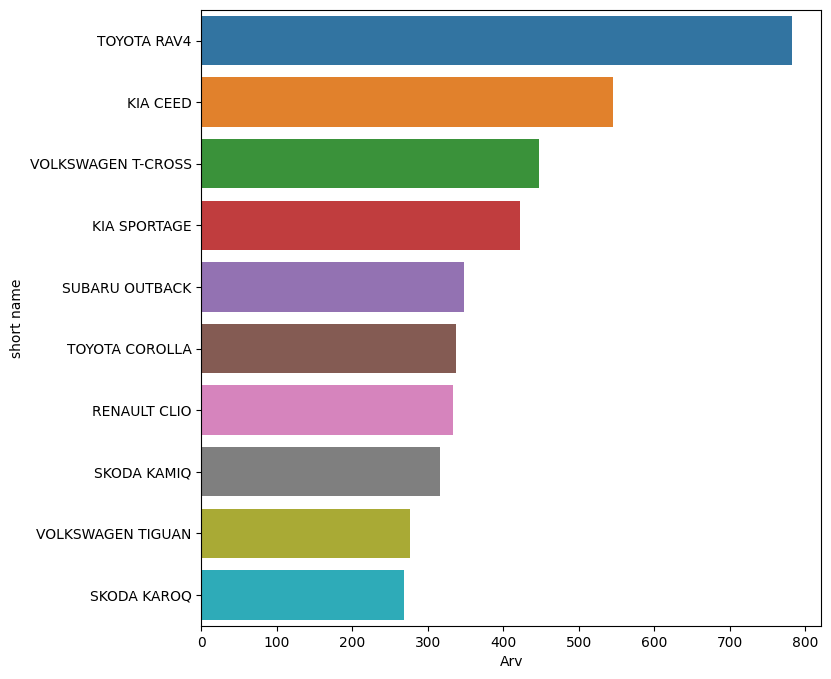

In [13]:
df_petrol = df[df["Mootori tüüp"].isin(["BENSIIN_KATALYSAATOR", "BENSIIN"])]

group_sort_and_plot(df_petrol, [COLUMN_SHORT_NAME])

### Top 10 popular hybrid models(diesel and petrol)


           short name  Arv
1         TOYOTA RAV4  658
2      TOYOTA COROLLA  585
3       SKODA OCTAVIA  407
4         TOYOTA C-HR  354
5     VOLKSWAGEN GOLF  345
6      HYUNDAI TUCSON  288
7          HONDA CR-V  257
8   TOYOTA HIGHLANDER  214
9        TOYOTA YARIS  207
10       TOYOTA CAMRY  192


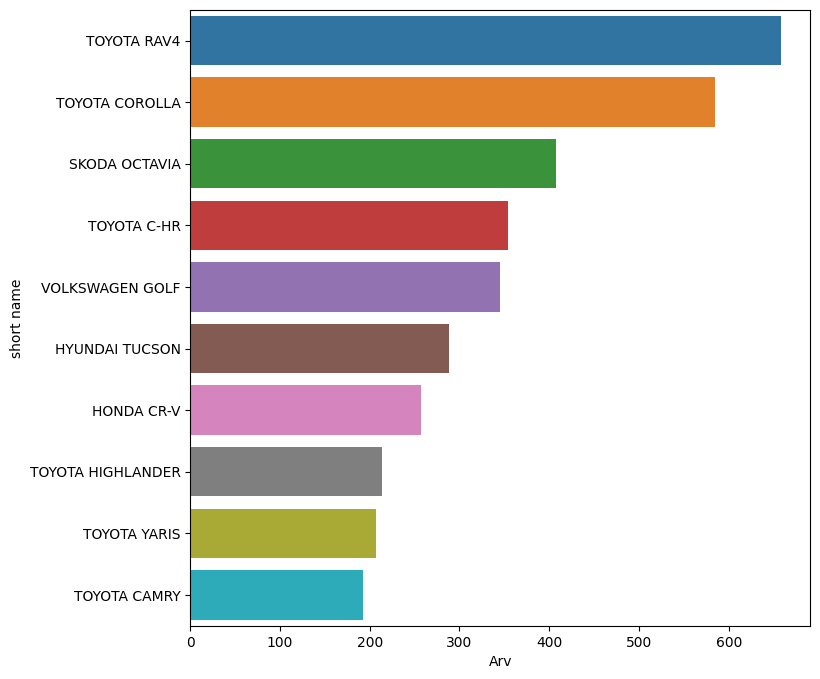

In [14]:
df_hybrids = df[df["Mootori tüüp"].str.contains("HYBRIID", case=False)]

group_sort_and_plot(df_hybrids, [COLUMN_SHORT_NAME])

### Top 10 popular electric models

         short name  Arv
1       SKODA ENYAQ   98
2       NISSAN LEAF   47
3    PORSCHE TAYCAN   38
4       RENAULT ZOE   36
5       AUDI E-TRON   35
6    HYUNDAI IONIQ5   25
7          KIA NIRO   24
8   VOLKSWAGEN ID.3   24
9       PEUGEOT 208   24
10     PEUGEOT 2008   19


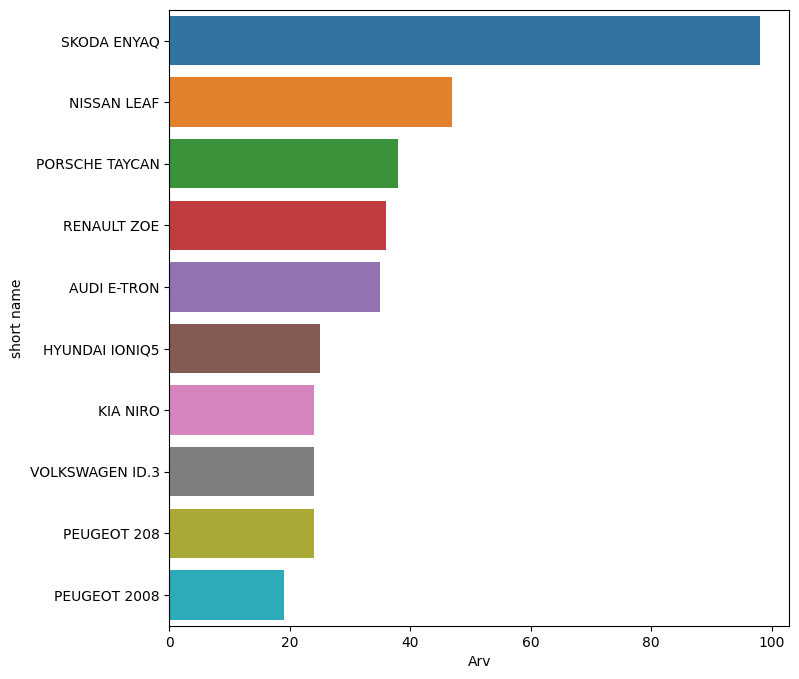

In [15]:
df_electric = df[df["Mootori tüüp"] == "ELEKTER"]

group_sort_and_plot(df_electric, [COLUMN_SHORT_NAME])

### Top 10 popular cars by private owners

           short name  Arv
1         TOYOTA RAV4  736
2       SKODA OCTAVIA  492
3      TOYOTA COROLLA  431
4        KIA SPORTAGE  405
5            KIA CEED  318
6        SKODA KODIAQ  249
7         SKODA KAROQ  230
8   VOLKSWAGEN TIGUAN  221
9         TOYOTA C-HR  218
10     SUBARU OUTBACK  205


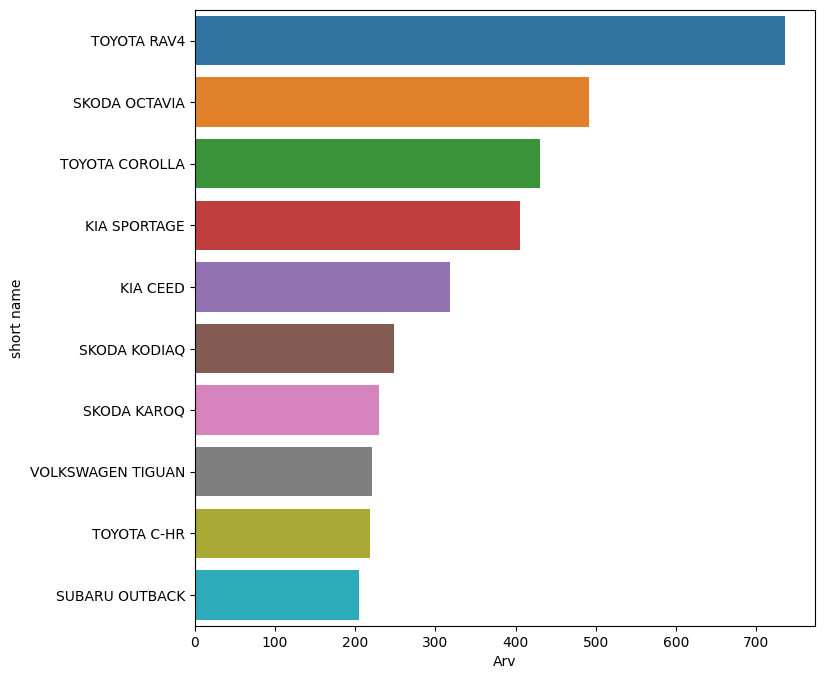

In [16]:
df_private = df[df[COLUMN_CUSTOMER].str.contains(PRIVATE_CUSTOMER, case=False)]

group_sort_and_plot(df_private, [COLUMN_SHORT_NAME])

### Top 10 popular cars by company owners

            short name  Arv
1          TOYOTA RAV4  704
2        SKODA OCTAVIA  618
3       TOYOTA COROLLA  491
4     CITROEN BERLINGO  375
5      VOLKSWAGEN GOLF  346
6             KIA CEED  346
7   VOLKSWAGEN T-CROSS  341
8         RENAULT CLIO  332
9         PEUGEOT 3008  267
10        SKODA KODIAQ  231


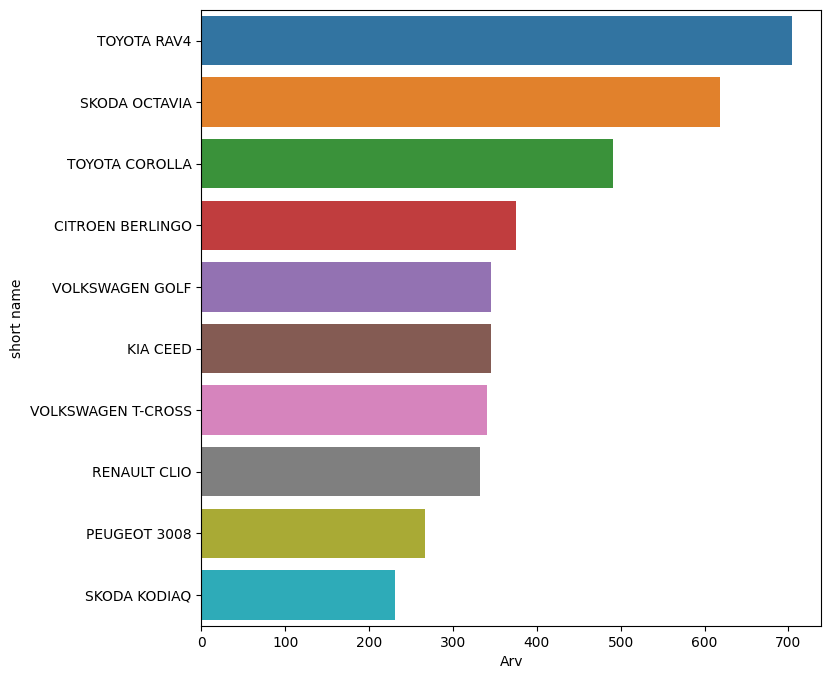

In [17]:
df_corporate = df[~df[COLUMN_CUSTOMER].str.contains(PRIVATE_CUSTOMER, case=False)]

group_sort_and_plot(df_corporate, [COLUMN_SHORT_NAME])

### SUV vs non SUV

           SUV    Arv
non-SUV  False  11862
SUV       True  10761


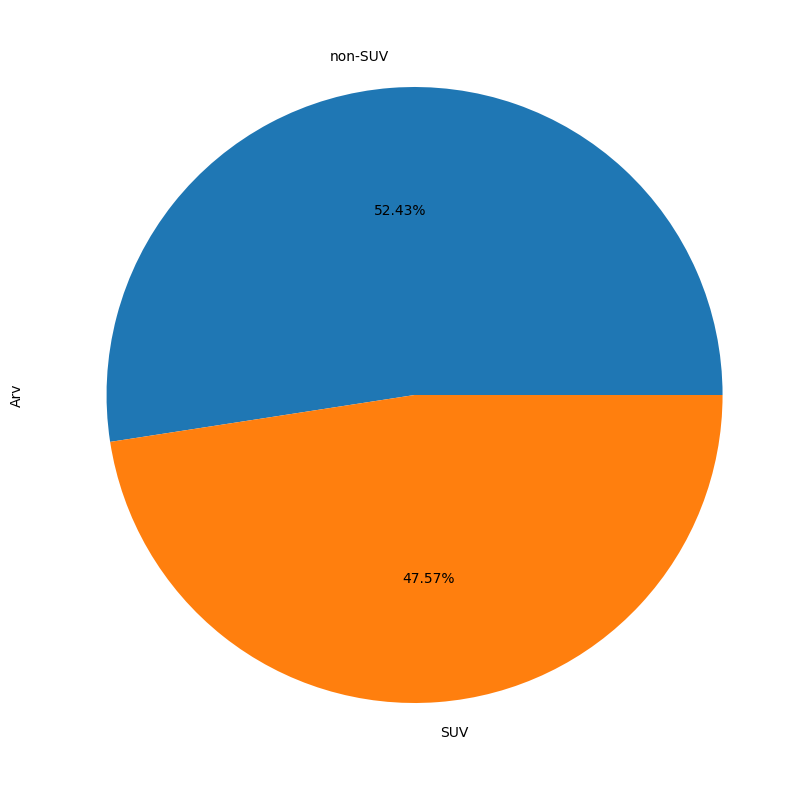

In [18]:
show_pie(df, "SUV", index=["non-SUV", "SUV"])

### Popular fuels in SUV

                       Arv
Mootori tüüp              
BENSIIN_KATALYSAATOR  5483
BENSIIN_HYBRIID       2741
DIISEL                1887
DIISEL_HYBRIID         413
ELEKTER                122
CNG                     99
BENSIIN                 16


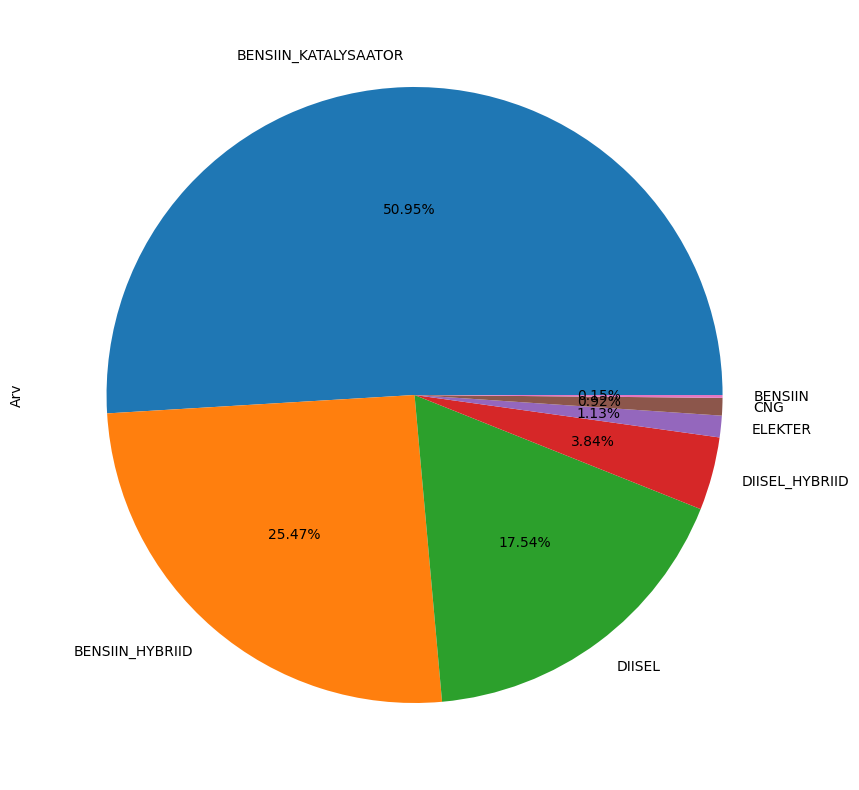

In [19]:
df_suv = df[df["SUV"]]

show_pie(df_suv, "Mootori tüüp")

### Top 10 popular SUV

            short name   Arv
1          TOYOTA RAV4  1440
2         KIA SPORTAGE   633
3         SKODA KODIAQ   480
4   VOLKSWAGEN T-CROSS   447
5          SKODA KAMIQ   406
6         DACIA DUSTER   400
7          TOYOTA C-HR   354
8         PEUGEOT 3008   349
9       HYUNDAI TUCSON   340
10        PEUGEOT 2008   337


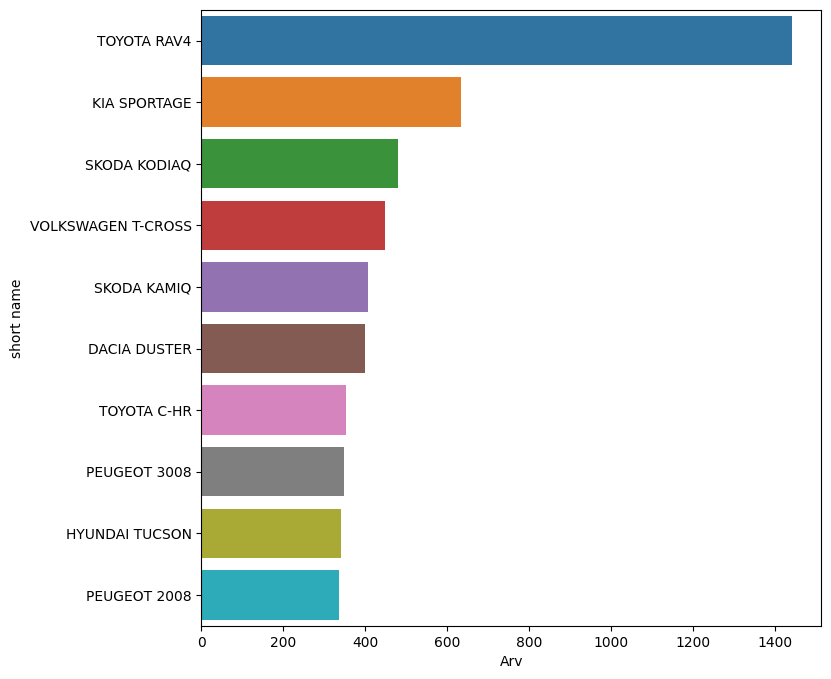

In [20]:
group_sort_and_plot(df_suv, [COLUMN_SHORT_NAME])

### Top 10 popular Diesel SUV

             short name  Arv
1          PEUGEOT 3008  285
2          DACIA DUSTER  236
3          SKODA KODIAQ  226
4          PEUGEOT 5008  207
5          KIA SPORTAGE  204
6          PEUGEOT 2008  204
7               AUDI Q3  145
8   CITROEN C5 AIRCROSS  129
9            VOLVO XC90  117
10          KIA SORENTO   67


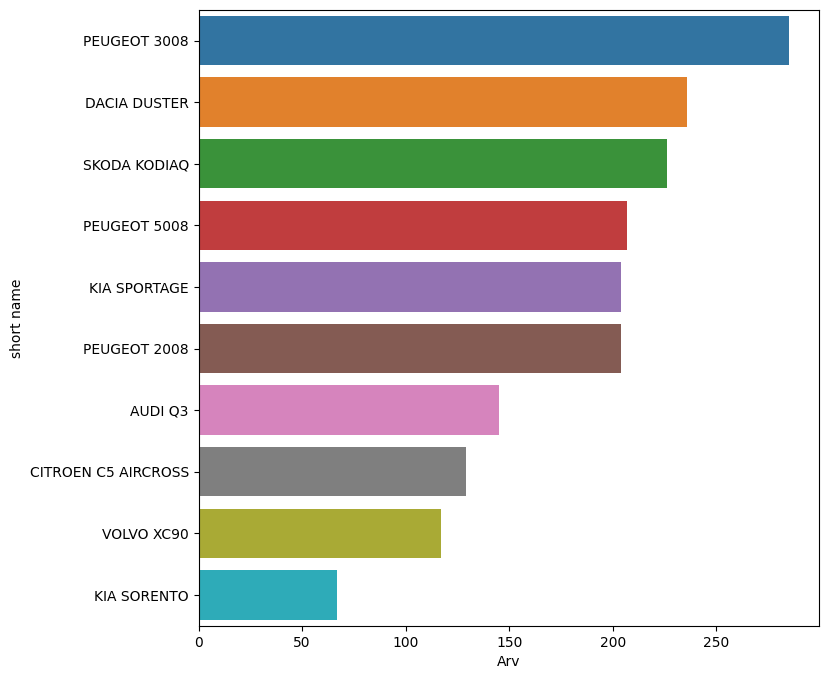

In [21]:
df_diesel_suv = df_diesel[df_diesel["SUV"]]

group_sort_and_plot(df_diesel_suv, [COLUMN_SHORT_NAME])

### Top 10 popular Petrol SUV

             short name  Arv
1           TOYOTA RAV4  782
2    VOLKSWAGEN T-CROSS  447
3          KIA SPORTAGE  422
4           SKODA KAMIQ  316
5     VOLKSWAGEN TIGUAN  277
6           SKODA KAROQ  268
7      VOLKSWAGEN T-ROC  265
8          SKODA KODIAQ  254
9   CITROEN C3 AIRCROSS  236
10       OPEL CROSSLAND  215


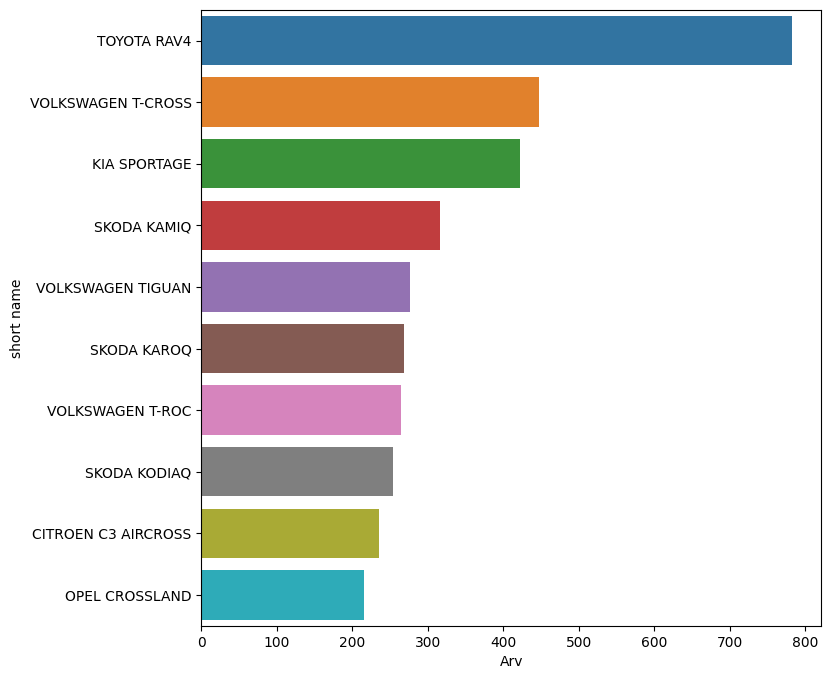

In [22]:
df_petrol_suv = df_petrol[df_petrol["SUV"]]

group_sort_and_plot(df_petrol_suv, [COLUMN_SHORT_NAME])

### Top 10 popular hybrid SUV

         short name  Arv
1       TOYOTA RAV4  658
2       TOYOTA C-HR  354
3    HYUNDAI TUCSON  288
4        HONDA CR-V  257
5    RENAULT ARKANA  145
6    NISSAN QASHQAI  131
7   SUBARU FORESTER  131
8        VOLVO XC60  130
9        VOLVO XC90  127
10     KIA SPORTAGE  109


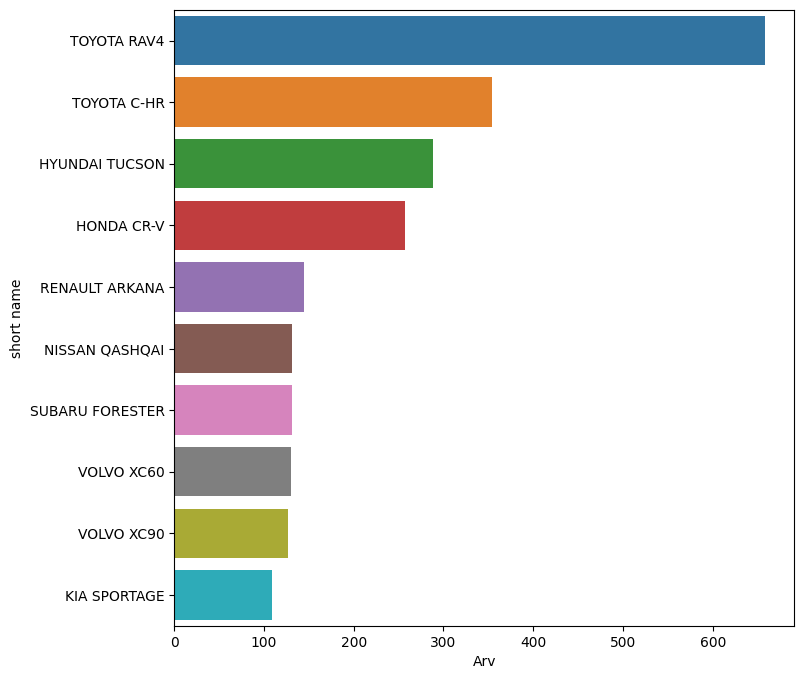

In [23]:
df_hybrid_suv = df_hybrids[df_hybrids["SUV"]]

group_sort_and_plot(df_hybrid_suv, [COLUMN_SHORT_NAME])

### Most popular models per city

In [24]:
# Popular car per each city
cities = sorted(df[COLUMN_CITY].unique())

for city in sorted(cities):
    print()
    print(city)
    group_sort_and_plot(
        df[df[COLUMN_CITY] == city], [COLUMN_SHORT_NAME], limit=3, plot=False
    )


Haapsalu
     short name  Arv
1  KIA SPORTAGE   15
2   TOYOTA RAV4    8
3      KIA CEED    8

Keila
      short name  Arv
1  SKODA OCTAVIA    9
2    TOYOTA RAV4    6
3   PEUGEOT 5008    5

Kohtla-Järve
     short name  Arv
1  KIA SPORTAGE   20
2   TOYOTA RAV4   14
3      KIA CEED   10

Loksa
    short name  Arv
1       BMW X5    2
2  HONDA CIVIC    2
3  TOYOTA RAV4    2

Maardu
       short name  Arv
1     TOYOTA RAV4   22
2  TOYOTA COROLLA   11
3   SKODA OCTAVIA   10

Määramata
      short name  Arv
1    TOYOTA RAV4  511
2  SKODA OCTAVIA  445
3   RENAULT CLIO  323

Narva
       short name  Arv
1     TOYOTA RAV4   51
2    KIA SPORTAGE   44
3  TOYOTA COROLLA   15

Narva-Jõesuu
       short name  Arv
1     TOYOTA RAV4    7
2  TOYOTA COROLLA    5
3  SUBARU OUTBACK    2

Paide
      short name  Arv
1    TOYOTA RAV4    9
2  SKODA OCTAVIA    7
3    SKODA KAROQ    5

Pärnu
       short name  Arv
1   SKODA OCTAVIA   36
2      HONDA CR-V   31
3  TOYOTA COROLLA   26

Rakvere
      short name  A

# Top 3 for each mark

In [25]:
df_group = group_and_sort(df, ["Mark"])
marks = df_group.head(20)["Mark"].tolist()
df_group.set_index("Mark", inplace=True)

for mark in marks:
    models = df[df["Mark"] == mark]
    count = df_group.loc[mark, "Arv"]
    print(f"{mark} total: {count}")
    if not models.empty:
        print(f"Top 3 {mark} models")
        group_sort_and_plot(models, [COLUMN_SHORT_NAME], limit=3, plot=False)
        print()

TOYOTA total: 3851
Top 3 TOYOTA models
       short name   Arv
1     TOYOTA RAV4  1440
2  TOYOTA COROLLA   922
3    TOYOTA YARIS   379

SKODA total: 3157
Top 3 SKODA models
      short name   Arv
1  SKODA OCTAVIA  1110
2   SKODA KODIAQ   480
3    SKODA KAMIQ   406

VOLKSWAGEN total: 1968
Top 3 VOLKSWAGEN models
           short name  Arv
1  VOLKSWAGEN T-CROSS  447
2     VOLKSWAGEN GOLF  394
3   VOLKSWAGEN TIGUAN  337

KIA total: 1867
Top 3 KIA models
     short name  Arv
1      KIA CEED  664
2  KIA SPORTAGE  633
3   KIA PROCEED  137

PEUGEOT total: 1393
Top 3 PEUGEOT models
     short name  Arv
1  PEUGEOT 3008  349
2  PEUGEOT 2008  337
3  PEUGEOT 5008  282

CITROEN total: 1318
Top 3 CITROEN models
            short name  Arv
1     CITROEN BERLINGO  428
2           CITROEN C3  243
3  CITROEN C3 AIRCROSS  236

RENAULT total: 1152
Top 3 RENAULT models
       short name  Arv
1    RENAULT CLIO  375
2  RENAULT CAPTUR  262
3  RENAULT ARKANA  145

HYUNDAI total: 971
Top 3 HYUNDAI models
      

# Top private diesel cars

       short name  Arv
1    PEUGEOT 5008  109
2   SKODA OCTAVIA  107
3    KIA SPORTAGE  102
4    PEUGEOT 2008   98
5    SKODA KODIAQ   90
6    PEUGEOT 3008   61
7    DACIA DUSTER   47
8      VOLVO XC90   39
9   TOYOTA PROACE   32
10    SKODA KAROQ   32


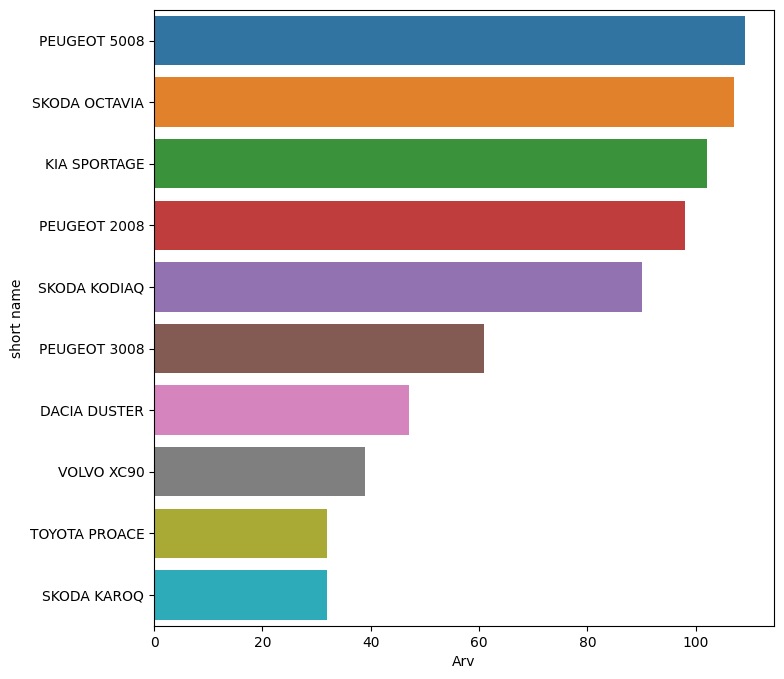

In [26]:
df_diesel_private_suv = df_diesel[
    df_diesel[COLUMN_CUSTOMER].apply(lambda x: PRIVATE_CUSTOMER in x)
]

group_sort_and_plot(df_diesel_private_suv, [COLUMN_SHORT_NAME])